# <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  Text Classification of ChatGPT Tweets on Education </center>

##### Ayetijhya Desmukhya, 465719

## Table of Contents

1. Introduction
    
2. Classification models

4. Conclusion

5. References


# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  1.Introduction  </center></p>

>The application  of text sentiment  analysis is one of  the applications  of  artificial  intelligence  to  investigate  the implicit sentiments in texts, whether they are bad, good, or  neutral[1].

Various approaches are utilized to analyze emotions in text, encompassing language modeling techniques, artificial intelligence, and machine learning. These approaches assess a range of emotions, such as happiness, fear, sorrow, anger, and more. The techniques leverage linguistic text analysis, statistical insights, and contextual examination of text to identify the different types of emotions expressed within the writing.

In today’s digital landscape, especially with the rise of social media, platforms such as Twitter[X] have emerged as influential avenues for individuals to voice their opinions, share personal experiences, and engage in conversations about a wide range of societal issues, education being a notable highlight. This project aims to delve deeply into the analysis of tweets on influence ChatGPT in education.

### Background

The integration of artificial intelligence (AI) into the field of education has marked a significant transformation, reshaping the dynamics of both teaching practices and learning experiences. With the rise of tools such as ChatGPT, educators and students are increasingly leveraging AI to enhance their educational journeys. These tools provide valuable support for a range of activities, including generating innovative ideas, assisting with complex problem-solving, and offering personalized learning experiences.

However, this technological advancement has sparked a lively debate, reflecting a wide spectrum of opinions regarding its impact on the educational landscape. On one hand, many consider AI to be a powerful ally in the classroom, capable of streamlining tasks and enriching the learning environment. On the other hand, there are those who voice concerns about the limitations of AI, raising important questions about its ethical implications and the potential erosion of essential human interactions in the educational process. This ongoing discourse highlights the need for careful consideration as we navigate the evolving role of AI in education.

### Goal of the project

The objective of this project is to develop sentiment classification models that categorize tweets about education on ChatGPT into five predefined sentiment categories: very positive, positive, neutral, negative, and very negative. We will also compare and analyze the performance of different classification models with varying hyperparameters and deep learning models. Additionally, we aim to examine sentiment trends over time to understand how perceptions have evolved, and to visualize any peaks or changes in sentiment.

### Data description

Initially, the dataset is retrieved from Kaggle[1] which 'contains a CSV file related to ChatGPT including keywords(chatgpt, chat gpt) #hashtags and @mentions about ChatGPT, OpenAI's conversational AI model. The file includes information on `500,000` tweets. The dataset aims to help understand public opinion, trends, and potential applications of ChatGPT by analyzing tweet volume, sentiment, user engagement, and the influence of key AI events. The dataset offers valuable insights for companies, researchers, and policymakers, allowing them to make informed decisions and shape the future of AI-powered conversational technologies'[2]. It has the following columns:

- `date`           - The date and time when the tweet was posted
- `id`             - The id of the user
- `content`        - The content/text of the tweet
- `username`       - The username of the account from which the tweet was posted
- `like_count`     - The number of likes the tweet got
- `retweet_count`  - The number of retweets to the parent tweet got

However, this dataset is like a general view on ChatGPT in every field/industry but since my topic involved tweets regarding education specifically, I filtered the dataset  based on keywords such as `study, teacher, grading, and education`. As a result, I collected approximately `13,000` tweets spanning from `January to March 2023`. This refined dataset is then named `FilteredTweets_JanMarch2023.csv`.

Regrettably, the challenges associated with utilizing this dataset did not end there. A crucial component—a key column—was missing, specifically the target label needed for the classification process. To address this gap, I undertook a semi-automatic labelling procedure to add a new column to the dataset. The entire process of data cleaning, along with the semi-automatic labelling, and data visualisation was carried out in a separate Jupyter notebook titled `DataCleaning_SemiAutomaticLabelling_AyetijhyaDesmukhya_465719`. This notebook serves as the foundation for preparing the dataset for further analysis and modeling.

Finally, we have our refined `RefinedTweets_JanMarch2023.csv` dataset appropriate for our use case ready. Here, we have the following modified columns: 

- `date`             - Only the date when the tweet was posted
- `content`          - The content/text of the tweet
- `cleaned_content`  - The cleaned/pre-processed content/text of the tweet
- `sentiment`        - The sentiment category the tweet falls under [2-very positive, 1-positive, 0-neutral, -1-negative, -2-very negative]

In this notebook, we will delve into the critical processes of model training, testing, and evaluation. We will explore how the model learns from the data, assess its performance on unseen data, and draw conclusions based on our findings.

In [80]:
# Load librarires
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Import necessary functions for model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


# Import classifiers for model training
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,  AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
colour = '#6891e8'

In [3]:
# Data Loading
tweets = pd.read_csv('data/RefinedTweets_JanMarch2023.csv')
tweets.head(20)

,content,cleaned_content,sentiment
0,Lots of teachers worrying about Chat GPT makin...,lot teacher worrying making essay writing too ...,-1
1,Can #ChatGPT really help create the new â€œSup...,really help create new superteacher whats kryp...,2
2,@jdflynn @dr_t_teacher Is this ALSO Chat GPT?!...,also surely not true,0
3,I asked Chat GPT why teachers are so underpaid...,asked teacher underpaid,-1
4,One of my FAVE thought leaders to learn from i...,one fave thought leader learn youre curious tr...,2
5,Teachers: discussing #ChatGPT &amp; how to com...,teacher discussing combat classroom leader won...,-1
6,absolutely obsessed with my sociology teacher ...,absolutely obsessed sociology write paragraph ...,0
7,â€œAfter spending 100s of hours\n\nIâ€™ve foun...,spending hour ive found secret us prompt level...,1
8,This cool! Starting my new teacher newsletter ...,cool starting new newsletter april topic selfc...,2
9,ChatGPT teacher warns pupils not to use AI\n h...,warns pupil not use,-2


In [4]:
# Counting the missing values again - these represents those data which after pre-processing has empty
# contents and when it gets saved to a .csv file these values are converted to NAN.

nans = tweets.isna().sum().sort_values(ascending = False)
pct = (nans/tweets.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                 NaN Values Count  NaN Values Percentage (%)
cleaned_content                26                       0.19
content                         0                       0.00
sentiment                       0                       0.00


In [5]:
missing_rows = tweets[tweets.isna().any(axis=1)]
print("Rows with missing values:")
missing_rows

Rows with missing values:


,content,cleaned_content,sentiment
1188,Should #Maine #Kids Have to Do &amp; #RemoteLe...,NaN,-1
1564,#Ù„Ø§ÛÙˆØ±_ÛØ§Ø¦ÛŒÚ©ÙˆØ±Ù¹_Ù¾ÛÙ†Ú†ÛŒÚº #Ø§Ù...,NaN,-1
1565,#Ù„Ø§ÛÙˆØ±_ÛØ§Ø¦ÛŒÚ©ÙˆØ±Ù¹_Ù¾ÛÙ†Ú†ÛŒÚº #Ø§Ù...,NaN,-1
1568,#Ù„Ø§ÛÙˆØ±_ÛØ§Ø¦ÛŒÚ©ÙˆØ±Ù¹_Ù¾ÛÙ†Ú†ÛŒÚº #Ø§Ù...,NaN,-1
2338,@REfenteacher Chat gpt ðŸ˜,NaN,-1
2844,@KGallagher_SCI Teacher #ChatGPT https://t.co/...,NaN,-1
3042,How are you using Chat GPT as a teacher? \n\n#...,NaN,-1
3870,Be your own teacher #Ai #ChatGPT #ChatGPTs,NaN,-1
4146,#NYC #Bans #Students and #Teachers from Using ...,NaN,-1
4258,Chat gpt is my teacher ðŸ™,NaN,-1


In [6]:
tweets = tweets.dropna()

# Check if rows were dropped
nans = tweets.isna().sum().sort_values(ascending = False)
pct = (nans/tweets.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                 NaN Values Count  NaN Values Percentage (%)
content                         0                        0.0
cleaned_content                 0                        0.0
sentiment                       0                        0.0


# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  2. Classification Models  </center></p>

In [7]:
# First, split the data into train (80%) and temporary (validation + test) (20%) sets
train_df, temp_df = train_test_split(tweets, test_size=0.2, random_state=123)

# Now, split the temporary set into validation and test sets (80% of temp_df for validation, 20% for test)
val_df, test_df = train_test_split(temp_df, test_size=0.2, random_state=123)

print('Train Sample: ', train_df.shape, '\nValidation Sample: ', val_df.shape, '\nTest Sample: ', test_df.shape)

Train Sample:  (10700, 3) 
Validation Sample:  (2140, 3) 
Test Sample:  (535, 3)


In [8]:
feature = 'cleaned_content'
target = 'sentiment'

`TfidfVectorizer` convert a collection of raw documents to a matrix of TF-IDF features[2] that can be used as input to machine learning models. In our case, the number of features (terms) extracted from the text is limited to the top 5,000 most important terms based on their TF-IDF score (frequency of term, adjusted by its importance across the document corpus). This is a way to reduce dimensionality and focus on the most relevant words for classification.

Then it learns the vocabulary (the unique terms or words) from the training data and then transforms the text into a matrix of TF-IDF features, where each row corresponds to a document, and each column corresponds to a term (or n-gram) in the vocabulary. The values in the matrix represent the TF-IDF score for each word/term in each document. Finally, we convert the sparse matrix (the result from `fit_transform`) into a dense NumPy array. 

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df[feature]).toarray()
X_val = vectorizer.transform(val_df[feature]).toarray()
X_test = vectorizer.transform(test_df[feature]).toarray()
y_train = train_df[target]
y_val = val_df[target]
y_test = test_df[target]

### Machine Learning Models

In [10]:
# Define classifiers
classifiers = {
    # Linear models
    "Logistic Regression": LogisticRegression(random_state=123), # Good for multi-class classification
    'SGD':SGDClassifier(), # Scalable and efficient for large datasets
    
    # Probabilistic model
    "Naive Bayes": MultinomialNB(), # Works well with text data
    
     # Support-vector-machine
    "LinearSVC":LinearSVC(), # Good for high-dimensional spaces (in our case, TF-IDF features)
    
    # Ensemble models - can handle a variety of features (TF-IDF)
    "Random Forest": RandomForestClassifier(random_state=123),
    # "XGBoost": XGBClassifier(random_state=123), 
    "Extra Trees": ExtraTreesClassifier(),
    # "Gradient Boost": GradientBoostingClassifier(),
    # Similar to GradientBoost but much faster and scalable
    # "HistGradientBoost": HistGradientBoostingClassifier()
    # "CatBoost":CatBoostClassifier(),
    "LGBM":LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    
    # Neural Network Classifier
    "MLP": MLPClassifier() # Multi-Layer Perceptron
}

In [11]:
results = {}
cross_val_results = {}

# Wrap the loop with tqdm for progress tracking
for name, model in tqdm(classifiers.items(), desc="Training classifiers", unit="model"):
    print(f"\nTraining {name}...")
    
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_mean = np.mean(scores)
    cross_val_std = np.std(scores)
    
    # Train and validate on the validation set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Print evaluation metrics - accuracy, cross-validation accuracy, precision, recall, f1-score, support
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")
    print(classification_report(y_val, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    results[name] = acc
    cross_val_results[name] = (cross_val_mean, cross_val_std)

# Compare results
print("\nModel Comparison:")
for name in classifiers.keys():
    val_acc = results[name]
    cross_val_mean, cross_val_std = cross_val_results[name]
    print(f"{name} - Validation Accuracy: {val_acc:.4f}, Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")

Training classifiers:   0%|                                                                   | 0/9 [00:00<?, ?model/s]


Training Logistic Regression...


Training classifiers:  11%|██████▌                                                    | 1/9 [00:49<06:39, 49.91s/model]

Logistic Regression Accuracy: 0.5930
Logistic Regression Cross-Validation Accuracy: 0.5727 ± 0.0086
              precision    recall  f1-score   support

          -2       0.64      0.48      0.55       242
          -1       0.57      0.50      0.53       339
           0       0.60      0.63      0.61       360
           1       0.48      0.53      0.50       546
           2       0.69      0.72      0.70       653

    accuracy                           0.59      2140
   macro avg       0.59      0.57      0.58      2140
weighted avg       0.60      0.59      0.59      2140

Confusion Matrix:
[[115  43  37  34  13]
 [ 33 170  40  73  23]
 [ 12  29 226  70  23]
 [ 10  43  52 289 152]
 [ 10  15  23 136 469]]

Training SGD...


Training classifiers:  22%|█████████████                                              | 2/9 [02:10<07:57, 68.17s/model]

SGD Accuracy: 0.5944
SGD Cross-Validation Accuracy: 0.5805 ± 0.0109
              precision    recall  f1-score   support

          -2       0.60      0.59      0.59       242
          -1       0.51      0.56      0.54       339
           0       0.57      0.66      0.61       360
           1       0.57      0.32      0.41       546
           2       0.66      0.80      0.72       653

    accuracy                           0.59      2140
   macro avg       0.58      0.59      0.57      2140
weighted avg       0.59      0.59      0.58      2140

Confusion Matrix:
[[143  38  37  10  14]
 [ 46 191  48  26  28]
 [ 21  51 239  28  21]
 [ 14  72  77 174 209]
 [ 16  23  20  69 525]]

Training Naive Bayes...


Training classifiers:  33%|███████████████████▋                                       | 3/9 [02:13<03:50, 38.43s/model]

Naive Bayes Accuracy: 0.4897
Naive Bayes Cross-Validation Accuracy: 0.4487 ± 0.0109
              precision    recall  f1-score   support

          -2       0.77      0.29      0.42       242
          -1       0.66      0.23      0.34       339
           0       0.63      0.32      0.42       360
           1       0.37      0.48      0.42       546
           2       0.50      0.80      0.61       653

    accuracy                           0.49      2140
   macro avg       0.59      0.42      0.44      2140
weighted avg       0.55      0.49      0.47      2140

Confusion Matrix:
[[ 70  19  24  73  56]
 [ 11  79  21 124 104]
 [  4  10 115 116 115]
 [  6   8  19 261 252]
 [  0   3   3 124 523]]

Training LinearSVC...


Training classifiers:  44%|██████████████████████████▏                                | 4/9 [02:18<02:06, 25.23s/model]

LinearSVC Accuracy: 0.6014
LinearSVC Cross-Validation Accuracy: 0.5847 ± 0.0070
              precision    recall  f1-score   support

          -2       0.58      0.59      0.58       242
          -1       0.54      0.53      0.54       339
           0       0.61      0.64      0.63       360
           1       0.51      0.47      0.49       546
           2       0.70      0.73      0.71       653

    accuracy                           0.60      2140
   macro avg       0.59      0.59      0.59      2140
weighted avg       0.60      0.60      0.60      2140

Confusion Matrix:
[[142  34  29  24  13]
 [ 48 180  37  52  22]
 [ 23  34 232  53  18]
 [ 15  65  61 259 146]
 [ 17  18  20 124 474]]

Training Random Forest...


Training classifiers:  56%|████████████████████████████████▏                         | 5/9 [06:14<06:44, 101.00s/model]

Random Forest Accuracy: 0.6201
Random Forest Cross-Validation Accuracy: 0.5958 ± 0.0114
              precision    recall  f1-score   support

          -2       0.65      0.54      0.59       242
          -1       0.57      0.65      0.60       339
           0       0.61      0.62      0.61       360
           1       0.55      0.51      0.53       546
           2       0.70      0.73      0.71       653

    accuracy                           0.62      2140
   macro avg       0.61      0.61      0.61      2140
weighted avg       0.62      0.62      0.62      2140

Confusion Matrix:
[[131  32  35  26  18]
 [ 33 220  31  31  24]
 [ 17  62 222  39  20]
 [ 14  61  54 280 137]
 [  8  14  24 133 474]]

Training Extra Trees...


Training classifiers:  67%|██████████████████████████████████████▋                   | 6/9 [11:31<08:43, 174.59s/model]

Extra Trees Accuracy: 0.6491
Extra Trees Cross-Validation Accuracy: 0.6264 ± 0.0086
              precision    recall  f1-score   support

          -2       0.65      0.59      0.61       242
          -1       0.65      0.63      0.64       339
           0       0.66      0.68      0.67       360
           1       0.57      0.57      0.57       546
           2       0.71      0.73      0.72       653

    accuracy                           0.65      2140
   macro avg       0.65      0.64      0.64      2140
weighted avg       0.65      0.65      0.65      2140

Confusion Matrix:
[[142  24  33  23  20]
 [ 36 214  30  35  24]
 [ 19  43 246  27  25]
 [ 15  40  50 311 130]
 [  8   9  11 149 476]]

Training LGBM...


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32013
[LightGBM] [Info] Number of data points in the train set: 10700, number of used features: 1152
[LightGBM] [Info] Start training from score -2.150305
[LightGBM] [Info] Start training from score -1.780792
[LightGBM] [Info] Start training from score -1.679600
[LightGBM] [Info] Start training from score -1.376622
[LightGBM] [Info] Start training from score -1.286745


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training classifiers:  78%|█████████████████████████████████████████████             | 7/9 [11:46<04:04, 122.49s/model]

LGBM Accuracy: 0.6140
LGBM Cross-Validation Accuracy: 0.5824 ± 0.0069
              precision    recall  f1-score   support

          -2       0.60      0.54      0.57       242
          -1       0.59      0.57      0.58       339
           0       0.61      0.62      0.61       360
           1       0.52      0.51      0.51       546
           2       0.71      0.75      0.73       653

    accuracy                           0.61      2140
   macro avg       0.61      0.60      0.60      2140
weighted avg       0.61      0.61      0.61      2140

Confusion Matrix:
[[131  33  33  30  15]
 [ 43 194  36  45  21]
 [ 13  33 224  72  18]
 [ 17  53  50 277 149]
 [ 13  15  26 111 488]]

Training AdaBoost...


Training classifiers:  89%|███████████████████████████████████████████████████▌      | 8/9 [14:16<02:11, 131.21s/model]

AdaBoost Accuracy: 0.3977
AdaBoost Cross-Validation Accuracy: 0.3524 ± 0.0039
              precision    recall  f1-score   support

          -2       0.87      0.11      0.20       242
          -1       1.00      0.06      0.12       339
           0       0.45      0.28      0.35       360
           1       0.29      0.71      0.41       546
           2       0.61      0.48      0.54       653

    accuracy                           0.40      2140
   macro avg       0.64      0.33      0.32      2140
weighted avg       0.59      0.40      0.37      2140

Confusion Matrix:
[[ 27   0  21 161  33]
 [  1  22  23 268  25]
 [  1   0 102 228  29]
 [  0   0  45 387 114]
 [  2   0  38 300 313]]

Training MLP...


Training classifiers: 100%|██████████████████████████████████████████████████████████| 9/9 [24:39<00:00, 164.37s/model]

MLP Accuracy: 0.5949
MLP Cross-Validation Accuracy: 0.5655 ± 0.0055
              precision    recall  f1-score   support

          -2       0.53      0.56      0.54       242
          -1       0.50      0.50      0.50       339
           0       0.58      0.58      0.58       360
           1       0.53      0.57      0.55       546
           2       0.75      0.68      0.72       653

    accuracy                           0.59      2140
   macro avg       0.58      0.58      0.58      2140
weighted avg       0.60      0.59      0.60      2140

Confusion Matrix:
[[136  40  30  26  10]
 [ 56 171  38  56  18]
 [ 31  52 209  58  10]
 [ 17  58  52 312 107]
 [ 19  22  30 137 445]]

Model Comparison:
Logistic Regression - Validation Accuracy: 0.5930, Cross-Validation Accuracy: 0.5727 ± 0.0086
SGD - Validation Accuracy: 0.5944, Cross-Validation Accuracy: 0.5805 ± 0.0109
Naive Bayes - Validation Accuracy: 0.4897, Cross-Validation Accuracy: 0.4487 ± 0.0109
LinearSVC - Validation Accuracy:

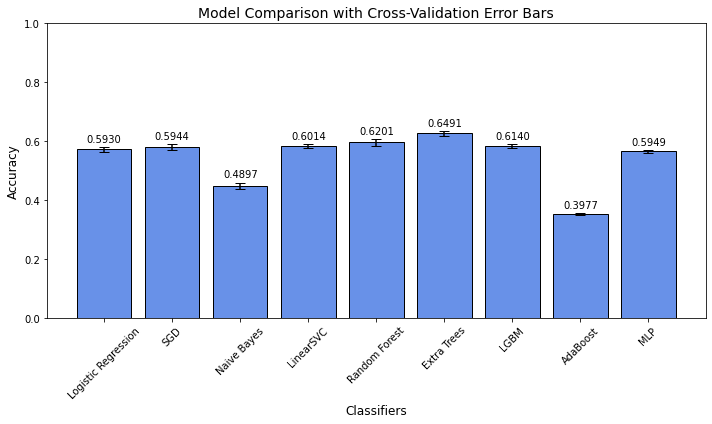

In [12]:
# Plotting the comparison between models
fig, ax = plt.subplots(figsize=(10, 6))

model_names = list(classifiers.keys())
validation_accuracies = list(results.values())
cross_val_means = [cross_val_results[name][0] for name in model_names]
cross_val_stds = [cross_val_results[name][1] for name in model_names]

ax.bar(model_names, cross_val_means, yerr=cross_val_stds, capsize=5, color=colour, edgecolor='black')
for i, acc in enumerate(validation_accuracies):
    ax.text(i, cross_val_means[i] + cross_val_stds[i] + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

ax.set_title("Model Comparison with Cross-Validation Error Bars", fontsize=14)
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### Selecting Top 3 Models for further improvement with hyperparameter tuning

- `Extra Trees` classifier demonstrated the best performance among all models, with a `validation accuracy of 64.91% and a cross-validation accuracy of 62.64% ± 0.86%`. This classifier is inherently robust and less prone to overfitting due to its random feature selection during tree building.

- `Random Forest` recorded a `validation accuracy of 62.01% and a cross-validation accuracy of 59.58% ± 1.14%`. Random Forest's ensemble nature allows it to handle non-linear relationships well and provides robustness against overfitting.

- `LGBM (LightGBM)` showed a `validation accuracy of 61.40% and a cross-validation accuracy of 58.24% ± 0.69%`. LightGBM is a gradient boosting framework optimized for speed and performance, particularly on large datasets with many features.

In general, the ensemble methods (Extra Trees and Random Forest) consistently outperformed other models in terms of both validation and cross-validation accuracy. This aligns with the general understanding that ensemble approaches effectively reduce overfitting and variance while capturing complex patterns in the data. Their ability to aggregate multiple weak learners into a strong predictive model makes them highly suitable for sentiment classification tasks.

In [15]:
# Hyper-Parameter Tuning

# Define the top 3 classifiers
classifiers = {
    # Ensemble models
    "Random Forest": RandomForestClassifier(random_state=123),
    "Extra Trees": ExtraTreesClassifier(),
    "LGBM":LGBMClassifier()
}

# The commented parameters were used before to get the best parameter combination which is uncommented
param_grids = {
    # 'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3]
    'Random Forest': {'n_estimators': [150], 'max_depth': [None], 'min_samples_split': [3], 'min_samples_leaf': [1]},
    # 'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto', 'sqrt', 'log2']
    'Extra Trees': {'n_estimators': [150], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': ['sqrt']},
    # 'n_estimators': [50, 100, 150, 200, 250], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [31, 50, 100], 'max_depth': [-1, 5, 10], 'min_data_in_leaf': [20, 50], 'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
    'LGBM': {'n_estimators': [150], 'learning_rate': [0.1], 'num_leaves': [31], 'max_depth': [-1], 'min_data_in_leaf': [20]}
}


In [16]:
# Tune the models
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_val, y_val):
    
    # Use GridSearchCV with 3 cross-validation folds
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best model and hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"\nBest Parameters for {model.__class__.__name__}: {best_params}")
    
    # Predict on the validation set
    y_pred = best_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_mean = np.mean(scores)
    cross_val_std = np.std(scores)
    
    # Print the evaluation metrics - accuracy, cross-validation accuracy, precision, recall, f1-score, support
    print(f"{model.__class__.__name__} Accuracy on Validation Set: {acc:.4f}")
    print(f"{model.__class__.__name__} Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")
    
    return best_model, best_params, acc, cross_val_mean, cross_val_std

results = {}

# Train each model with hyperparameter tuning
for name, model in classifiers.items():
    print(f"\nTuning {name}...")
    best_model, best_params, acc, cross_val_mean, cross_val_std = train_and_evaluate_model(model, param_grids[name], X_train, y_train, X_val, y_val)
    results[name] = {'best_model': best_model, 'best_params': best_params, 'accuracy': acc, 'cross_val_mean': cross_val_mean, 'cross_val_std': cross_val_std}

print("\n\nModel Comparison (Validation Accuracy & Cross-Validation Accuracy):")
for name, result in results.items():
    print(f"{name}: Best Params - {result['best_params']}, Accuracy - {result['accuracy']:.4f}, Cross-Validation Accuracy: {result['cross_val_mean']:.4f} ± {result['cross_val_std']:.4f}")


Tuning Random Forest...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
RandomForestClassifier Accuracy on Validation Set: 0.6121
RandomForestClassifier Cross-Validation Accuracy: 0.5956 ± 0.0110
Classification Report:
              precision    recall  f1-score   support

          -2       0.65      0.53      0.58       242
          -1       0.57      0.64      0.60       339
           0       0.61      0.62      0.62       360
           1       0.53      0.48      0.50       546
           2       0.68      0.73      0.71       653

    accuracy                           0.61      2140
   macro avg       0.61      0.60      0.60      2140
weighted avg       0.61      0.61      0.61      2140


Tuning Extra Trees...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best Parameters for ExtraTreesClassifier: {'max_depth': None, 'm

d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32013
[LightGBM] [Info] Number of data points in the train set: 10700, number of used features: 1152
[LightGBM] [Info] Start training from score -2.150305
[LightGBM] [Info] Start training from score -1.780792
[LightGBM] [Info] Start training from score -1.679600
[LightGBM] [Info] Start training from score -1.376622
[LightGBM] [Info] Start training from score -1.286745

Best Parameters for LGBMClassifier: {'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 150, 'num_lea

d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier Accuracy on Validation Set: 0.6173
LGBMClassifier Cross-Validation Accuracy: 0.5859 ± 0.0076
Classification Report:
              precision    recall  f1-score   support

          -2       0.60      0.52      0.56       242
          -1       0.59      0.57      0.58       339
           0       0.61      0.63      0.62       360
           1       0.51      0.53      0.52       546
           2       0.73      0.74      0.74       653

    accuracy                           0.62      2140
   macro avg       0.61      0.60      0.60      2140
weighted avg       0.62      0.62      0.62      2140



Model Comparison (Validation Accuracy & Cross-Validation Accuracy):
Random Forest: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}, Accuracy - 0.6121, Cross-Validation Accuracy: 0.5956 ± 0.0110
Extra Trees: Best Params - {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimator

In [18]:
# Create a dictionary with the model comparison data

model_data = {
    'Model': ['Random Forest', 'Extra Trees', 'LGBM'],
    'Best Params': [
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}",
        "{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}",
        "{'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 150, 'num_leaves': 31}"
    ],
    'Validation Accuracy': [0.6121, 0.6444, 0.6173],
    'Cross-Validation Accuracy Mean': [0.5956, 0.6279, 0.5859],
    'Cross-Validation Accuracy Std': [0.0110, 0.0073, 0.0076]
}

model_df = pd.DataFrame(model_data)
model_df

,Model,Best Params,Validation Accuracy,Cross-Validation Accuracy Mean,Cross-Validation Accuracy Std
0,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.6121,0.5956,0.0110
1,Extra Trees,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.6444,0.6279,0.0073
2,LGBM,"{'feature_fraction': 1.0, 'learning_rate': 0.1...",0.6173,0.5859,0.0076


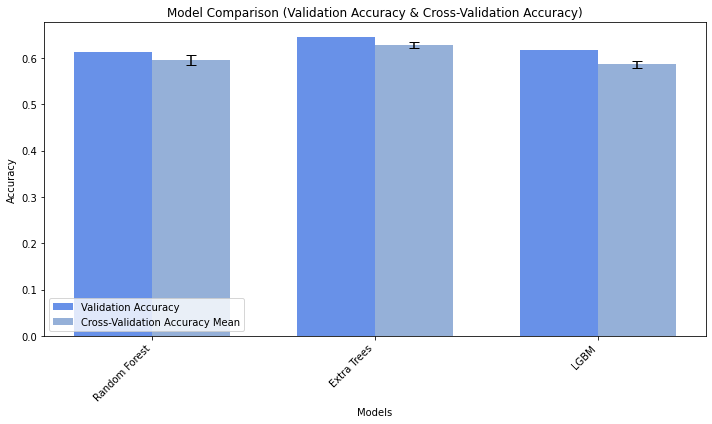

In [19]:
# Plotting the metrics (Validation Accuracy vs. Cross-Validation Accuracy)

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_df['Model']))
plt.bar(index, model_df['Validation Accuracy'], bar_width,  label='Validation Accuracy', color = colour)
plt.bar(index + bar_width, model_df['Cross-Validation Accuracy Mean'], bar_width, color='#4f7cbf', alpha=0.6, label='Cross-Validation Accuracy Mean')
plt.errorbar(index + bar_width, model_df['Cross-Validation Accuracy Mean'], yerr=model_df['Cross-Validation Accuracy Std'], fmt='none', color='black', capsize=5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison (Validation Accuracy & Cross-Validation Accuracy)')
plt.xticks(index + bar_width / 2, model_df['Model'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

The model comparison reveals that the `Extra Trees` classifier outperformed the other models with a validation accuracy of 64.44% and a cross-validation accuracy of 62.79% (±0.0073). The `Random Forest` achieved a validation accuracy of 61.21% and cross-validation accuracy of 59.56% (±0.0110), while the LGBM model had a validation accuracy of 61.73% and cross-validation accuracy of 58.59% (±0.0076). This highlights `Extra Trees` as the most effective model for this dataset.

In [22]:
# Predicting on test sample

# Define the top 3 classifiers
classifiers = {
    # Ensemble models
    "Random Forest": RandomForestClassifier(random_state=123),
    "Extra Trees": ExtraTreesClassifier(random_state=123),
    "LGBM":LGBMClassifier(random_state=123)
}

# Define parameters
param_grids = {
    'Random Forest': {'n_estimators': [150], 'max_depth': [None], 'min_samples_split': [3], 'min_samples_leaf': [1]},
    'Extra Trees': {'n_estimators': [150], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': ['sqrt']},
    'LGBM': {'n_estimators': [150], 'learning_rate': [0.1], 'num_leaves': [31], 'max_depth': [-1], 'min_data_in_leaf': [20]}
}

In [23]:
# Initialize dictionaries to store scores
accuracy_scores = dict()
precision_scores = dict()
recall_scores = dict()
f1_scores = dict()
roc_auc_scores = dict()

# Wrap the loop with tqdm for progress tracking
for name, model in tqdm(classifiers.items(), desc="Testing classifiers", unit="model"):
    print(f"\nTesting {name}...")
    
    # Train and validate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Check if the model supports probability predictions (e.g., for ROC AUC calculation)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)  # Predict probability scores for each class
    else:
        y_prob = None # If not supported, set probabilities to None
    
    # Calculate performance metric
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calculate ROC AUC score if probability predictions are available
    if y_prob is not None:
        # Compute ROC AUC for multi-class (one-vs-rest)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        # Set ROC AUC to NaN if probabilities are unavailable
        roc_auc = np.nan
    
    # Print performance metrics for the current model
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} ROC AUC: {roc_auc:.4f}")
    
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Store the computed metrics for comparison
    accuracy_scores[name] = acc
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1
    roc_auc_scores[name] = roc_auc

# Create a DataFrame to summarize all metrics across models
metrics_df = pd.DataFrame({
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "ROC AUC": roc_auc_scores
})
print(metrics_df)

Testing classifiers:   0%|                                                                    | 0/3 [00:00<?, ?model/s]


Testing Random Forest...


Testing classifiers:  33%|████████████████████                                        | 1/3 [01:15<02:31, 75.58s/model]

Random Forest Accuracy: 0.6075
Random Forest Precision: 0.6152
Random Forest Recall: 0.5967
Random Forest F1 Score: 0.5987
Random Forest ROC AUC: 0.8642
              precision    recall  f1-score   support

          -2       0.74      0.52      0.61        66
          -1       0.55      0.60      0.57        93
           0       0.57      0.65      0.61        97
           1       0.56      0.44      0.49       133
           2       0.66      0.78      0.72       146

    accuracy                           0.61       535
   macro avg       0.62      0.60      0.60       535
weighted avg       0.61      0.61      0.60       535

Confusion Matrix:
[[ 34  15   6   3   8]
 [  6  56  15   9   7]
 [  1  14  63  13   6]
 [  3  14  21  58  37]
 [  2   3   6  21 114]]

Testing Extra Trees...


Testing classifiers:  67%|███████████████████████████████████████▎                   | 2/3 [03:28<01:49, 109.56s/model]

Extra Trees Accuracy: 0.6654
Extra Trees Precision: 0.6672
Extra Trees Recall: 0.6494
Extra Trees F1 Score: 0.6534
Extra Trees ROC AUC: 0.8754
              precision    recall  f1-score   support

          -2       0.72      0.55      0.62        66
          -1       0.66      0.59      0.62        93
           0       0.62      0.73      0.67        97
           1       0.62      0.56      0.59       133
           2       0.71      0.82      0.76       146

    accuracy                           0.67       535
   macro avg       0.67      0.65      0.65       535
weighted avg       0.67      0.67      0.66       535

Confusion Matrix:
[[ 36  15   6   4   5]
 [  7  55  16   9   6]
 [  3   5  71  13   5]
 [  3   6  18  74  32]
 [  1   2   4  19 120]]

Testing LGBM...


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32013
[LightGBM] [Info] Number of data points in the train set: 10700, number of used features: 1152
[LightGBM] [Info] Start training from score -2.150305
[LightGBM] [Info] Start training from score -1.780792
[LightGBM] [Info] Start training from score -1.679600
[LightGBM] [Info] Start training from score -1.376622
[LightGBM] [Info] Start training from score -1.286745


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Testing classifiers: 100%|████████████████████████████████████████████████████████████| 3/3 [03:32<00:00, 70.89s/model]

LGBM Accuracy: 0.6168
LGBM Precision: 0.6100
LGBM Recall: 0.6028
LGBM F1 Score: 0.6044
LGBM ROC AUC: 0.8496
              precision    recall  f1-score   support

          -2       0.61      0.53      0.57        66
          -1       0.58      0.55      0.56        93
           0       0.64      0.66      0.65        97
           1       0.54      0.48      0.51       133
           2       0.68      0.79      0.73       146

    accuracy                           0.62       535
   macro avg       0.61      0.60      0.60       535
weighted avg       0.61      0.62      0.61       535

Confusion Matrix:
[[ 35  12   3   9   7]
 [ 11  51  10  15   6]
 [  3   6  64  16   8]
 [  5  12  18  64  34]
 [  3   7   5  15 116]]
               Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest  0.607477   0.615240  0.596740  0.598741  0.864228
Extra Trees    0.665421   0.667235  0.649424  0.653427  0.875391
LGBM           0.616822   0.609952  0.602841  0.604437  0.849584


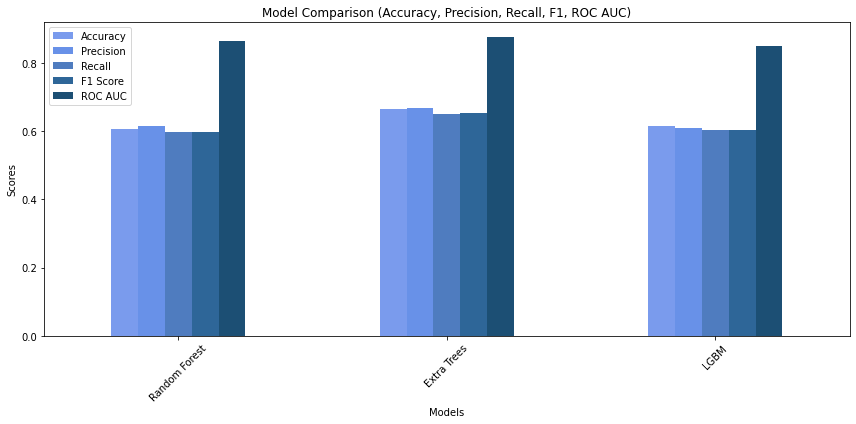

In [24]:
colour_shades = [
    '#7a9bed',
    '#6891e8',
    '#4f7cbf',
    '#2e6698',
    '#1c4f74' 
]

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(12, 6), color=colour_shades)
plt.title('Model Comparison (Accuracy, Precision, Recall, F1, ROC AUC)')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We are using the `ROC AUC` score with the `OvR approach` in `multi-class classification` as it is particularly effective in datasets with `class imbalance`. It ensures that the model's ability to identify all classes—especially the underrepresented ones—is fairly evaluated, providing a reliable and robust performance measure beyond simple accuracy or precision.

In [25]:
# Determine the best performing model based on ROC AUC (or F1 score)
best_model_name = metrics_df['ROC AUC'].idxmax()
best_model = classifiers[best_model_name]
print(f"\nBest Model Based on ROC AUC: {best_model_name}")


Best Model Based on ROC AUC: Extra Trees


### Deep Learning Model : RNN 

Simple neural networks are feed-forward, processing inputs all at once without memory of prior information. `Recurrent Neural Networks (RNNs)`, however, process input sequentially, maintaining an internal memory to capture context over time. This enables RNNs to account for word order and build an understanding of inputs step by step. 

In [ ]:
# Import required libraries
import tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create a linear stack of layers for the model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding,Dropout, Bidirectional, GlobalAveragePooling1D, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.constraints import max_norm

In [27]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(tweets[feature], tweets[target], test_size=0.2, random_state=42)

print('Train Sample: ', train_df.shape, '\nValidation Sample: ', val_df.shape, '\nTest Sample: ', test_df.shape)

Train Sample:  (10700, 3) 
Validation Sample:  (2140, 3) 
Test Sample:  (535, 3)


In [28]:
# Tokenization
tokenizer = Tokenizer(
    num_words=50000,  # Maximum number of words to keep based on frequency
    split=' ', # Specifies that tokens are separated by spaces
    char_level=False, # Indicates that tokenization is done at the word level, not character level
    oov_token='<UNK>'  # Token for out-of-vocabulary words
)

In [29]:
# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train)

# Print word index (optional)
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

Vocabulary size: 12715


In [30]:
# Transform texts to sequences
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

# Padding sequences to a fixed length
max_length = 50  # Maximum sequence length
train_padding = pad_sequences(train_sequence, maxlen=max_length, padding='post')
test_padding = pad_sequences(test_sequence, maxlen=max_length, padding='post')

In [31]:
# OneHotEncoder - Reshape target labels and apply transformation
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

In [73]:
# Building the baseline model

# Define a Sequential model
base_model = Sequential()
# Maps each word to a dense vector of fixed size (128)
base_model.add(Embedding(50000,128,input_length=train_padding.shape[1]))
# Computes the average of all the embeddings in a sequence,
# summarizing the entire sequence into a single fixed-length vector
base_model.add(GlobalAveragePooling1D())
# A fully connected transformation with non-linearity
base_model.add(Dense(8,activation='relu'))
# The softmax activation normalizes the output into a 
# probability distribution across the 5 classes.
base_model.add(Dense(5,activation='softmax'))

print(base_model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 50, 128)           6400000   
                                                                 
 global_average_pooling1d_13  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_38 (Dense)            (None, 8)                 1032      
                                                                 
 dense_39 (Dense)            (None, 5)                 45        
                                                                 
Total params: 6,401,077
Trainable params: 6,401,077
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
# Compile the model with `adam` optimizer and accuracy evaluation metrics
base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
# The `fit` method trains the model by optimizing weights based on the training data
history_base = base_model.fit(train_padding,y_train ,epochs=10, validation_split=0.2)

Epoch 1/10
268/268 [==============================] - 69s 98ms/step - loss: 1.5613 - accuracy: 0.2724 - val_loss: 1.5106 - val_accuracy: 0.3257
Epoch 2/10
268/268 [==============================] - 26s 99ms/step - loss: 1.4091 - accuracy: 0.3280 - val_loss: 1.3582 - val_accuracy: 0.3579
Epoch 3/10
268/268 [==============================] - 26s 96ms/step - loss: 1.2335 - accuracy: 0.4364 - val_loss: 1.2376 - val_accuracy: 0.4776
Epoch 4/10
268/268 [==============================] - 26s 97ms/step - loss: 1.0087 - accuracy: 0.6213 - val_loss: 1.1226 - val_accuracy: 0.5308
Epoch 5/10
268/268 [==============================] - 26s 96ms/step - loss: 0.8199 - accuracy: 0.6973 - val_loss: 1.0562 - val_accuracy: 0.5603
Epoch 6/10
268/268 [==============================] - 25s 95ms/step - loss: 0.6965 - accuracy: 0.7359 - val_loss: 1.0496 - val_accuracy: 0.5893
Epoch 7/10
268/268 [==============================] - 26s 97ms/step - loss: 0.6088 - accuracy: 0.7591 - val_loss: 1.0783 - val_accuracy:

(0.0, 1.6167325124144554)

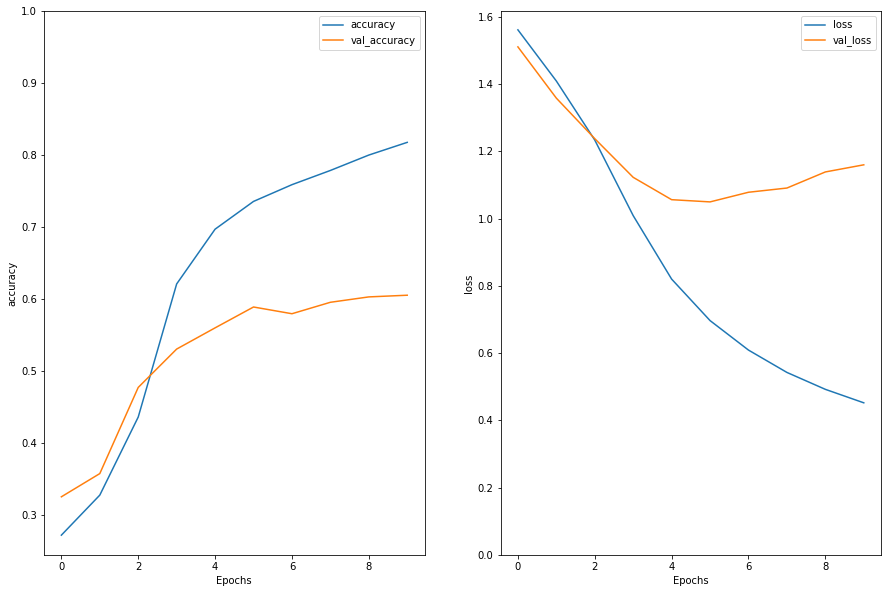

In [76]:
# Function to plot training and validation metrics over epochs
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(15, 10))
# Plot accuracy on the left subplot
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
# Plot loss on the right subplot
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

- Training accuracy improved consistently throughout the 10 epochs, starting from 27.24% in Epoch 1 and reaching 81.79% by Epoch 10. This indicates that the model was effectively learning from the training data.
- Validation accuracy, however, plateaued at around 59%-60% after Epoch 6, suggesting that while the model learned the training data well, it struggled to generalize to unseen data. This could indicate a potential overfitting problem, as the model continued to improve on the training set while the validation performance stagnated.
- The validation loss increased after Epoch 3, starting at 1.23 and rising to 1.16 by Epoch 10. This increase in validation loss, along with the plateau in validation accuracy, further supports the idea that the model may be overfitting, as it becomes increasingly tailored to the training data while losing its ability to generalize.

In [81]:
# Handling overfitting

# Adds a penalty term to the loss function based on the magnitude of the weights (L2 regularization)
# Discourages large weight values
regularise = tensorflow.keras.regularizers.l2(0.001)

improved_model = Sequential()
improved_model.add(Embedding(50000, 128, input_length=train_padding.shape[1]))
# Randomly sets a fraction (50% in this case) of input units to zero during each forward pass
# Prevents co-dependence of neurons
improved_model.add(GlobalAveragePooling1D())
improved_model.add(Dense(8,activation='relu',kernel_regularizer=regularise))
improved_model.add(Dropout(0.6))
improved_model.add(Dense(5,activation='softmax'))
print(improved_model.summary())

improved_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#  Stops training when the validation loss does not improve for 2 consecutive epochs
# Prevents overfitting by halting training before the model starts to memorize noise
# or irrelevant patterns in the training data
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_improved = improved_model.fit(train_padding,y_train ,epochs=10, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 50, 128)           6400000   
                                                                 
 global_average_pooling1d_15  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_42 (Dense)            (None, 8)                 1032      
                                                                 
 dropout_39 (Dropout)        (None, 8)                 0         
                                                                 
 dense_43 (Dense)            (None, 5)                 45        
                                                                 
Total params: 6,401,077
Trainable params: 6,401,077
Non-trainable params: 0
___________________________________________

(0.0, 1.608780837059021)

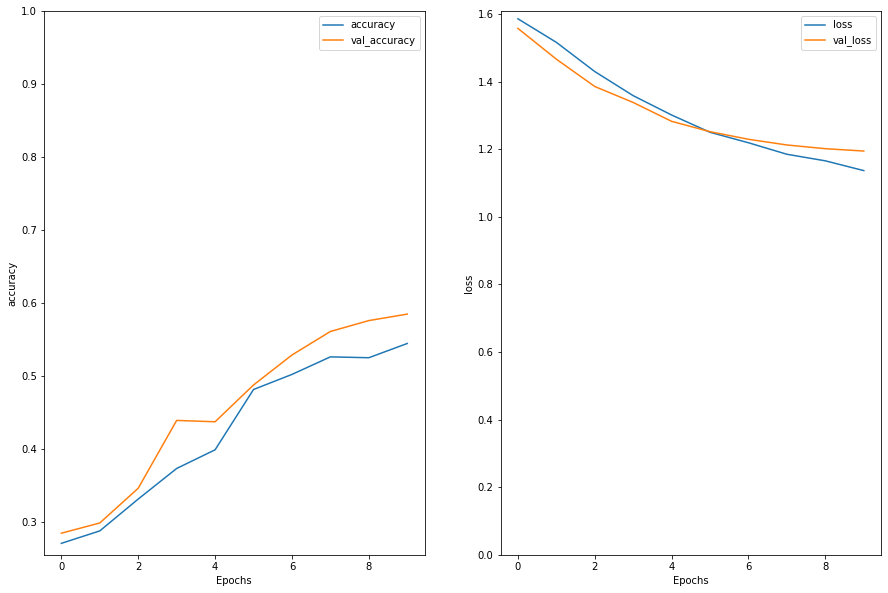

In [82]:
# Function to plot training and validation metrics over epochs
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(15, 10))
# Plot accuracy on the left subplot
plt.subplot(1, 2, 1)
plot_graphs(history_improved, 'accuracy')
plt.ylim(None, 1)
# Plot loss on the right subplot
plt.subplot(1, 2, 2)
plot_graphs(history_improved, 'loss')
plt.ylim(0, None)

84/84 [==============================] - 0s 4ms/step - loss: 1.1807 - accuracy: 0.5839
Testing Accuracy(%):  58.39252471923828
84/84 [==============================] - 0s 3ms/step


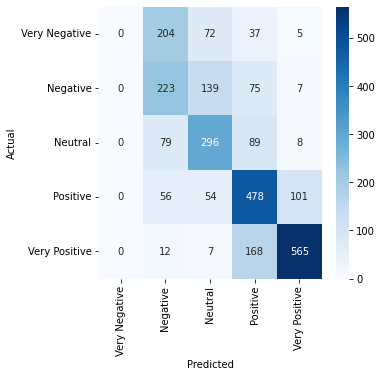

In [83]:
# Evaluate the model on the test data
score = improved_model.evaluate(test_padding,y_test) 
print("Testing Accuracy(%): ", score[1]*100)

# Predict the labels for the test data
y_pred = improved_model.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_predicted_labels)

# Plot confusion matrix
labels=['Very Negative', 'Negative', 'Neutral','Positive', 'Very Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- The model performs best on the Very Positive class with 565 correct predictions, followed by Positive (478). The model seems to struggle with predicting the Very Negative class, as it has no correct predictions (0).
- The model shows a notable class imbalance, especially with the Very Negative class, which has 0 correct predictions and high misclassifications into other classes. This suggest that the model is not well-trained on this class or that there is an issue in the dataset (e.g., very few instances of the Very Negative class in the training set).
- There are misclassifications between adjacent classes (e.g., Negative vs. Neutral, Positive vs. Very Positive), suggesting the model may not be able to distinguish between these classes effectively. This might be a sign of overlap in feature distributions or a lack of sufficient training data.

# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  7. Conclusion  </center></p>

- `Extra Trees` performs the best overall, with the highest accuracy of `0.6654`, followed by `Random Forest at 0.6075` and `LGBM at 0.6168`. This suggests that Extra Trees provides the most accurate predictions across all classes.
- In terms of precision, `Extra Trees` also leads with a precision score of `0.6672`, meaning it is more reliable at predicting positive instances with fewer false positives compared to the other models.
- The F1 score for `Extra Trees is 0.6534`, which offers a good balance between precision and recall. While it is the highest among all models, the value indicates room for improvement, as it is not significantly higher than other models.
- `Random Forest` achieves an `ROC AUC of 0.8642`, but `Extra Trees` surpasses it with a higher `ROC AUC of 0.8754`, indicating its superior ability to distinguish between classes and its robustness in distinguishing different categories.

Despite Extra Trees having the highest performance across all metrics, the maximum validation accuracy of 65% highlights the inherent challenges in text classification tasks, particularly when the data is limited or imbalanced. Even after extensive hyperparameter tuning, the improvements were relatively modest, with accuracy increasing by only 1-2%. This suggests that text classification problems, especially with a limited dataset, are complex and may require more sophisticated techniques or additional data to achieve significant improvements.

- Standard RNNs often struggle with retaining information from earlier inputs as sequences grow (vanishing gradient problem). `Long Short-Term Memory (LSTM)` networks address this by using a memory structure that retains both short-term and long-term information, allowing the model to recall any prior input as needed. This capability enhances the network's ability to identify complex relationships in sequential data.

##### Room for Improvement

- Additionally, to improve our approach in this project there are methods to effectively refine a vast dataset of tweets that discuss ChatGPT's impact on education, two powerful analytical approaches can be employed: Topic Modelling or Text Clustering. `Topic Modelling`, particularly through techniques like Latent Dirichlet Allocation (LDA), serves as an invaluable tool for uncovering hidden themes within the collection of tweets. This method will enable us to systematically identify and extract tweets that center around specific education-related topics, such as "learning" or the role of "AI in education." Conversely, `Text Clustering` focuses on grouping similar tweets based on their content, which is essential for isolating clusters of discussion that share common themes. For instance, we can identify specific clusters that reflect ChatGPT’s impact on teachers or students, thereby highlighting particular areas of interest and concern within the educational landscape.
- Accuracy gains, while helpful, point to the fact that achieving higher performance in text classification requires more than just tuning. Models might need to be further refined, and different techniques such as `deep learning (e.g., LSTM, GRU), transformers`, or additional data augmentation could be considered.
-  The testing accuracy for an RNN (Recurrent Neural Network) is very low suggesting improvement in areas such as feature engineering, we can experiment with different `embeddings (e.g., Word2Vec, GloVe, or transformers like BERT)` for better feature representations.
- There is some class imbalance when it comes to `Negative` categories, RNNs may have difficulty learning these minority classes. Techniques like oversampling, undersampling, or class weighting can help in balancing the dataset.

# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  8. References  </center></p>

[1] Aliea Sabir, Huda Adil Ali (2024) ChatGPT Tweets Sentiment Analysis Using Machine Learning and Data Classification

[2] Dataset - https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023?select=Twitter+Jan+Mar.csv

[3] Scikit-learn developers (BSD License) - TfidfVectorizer (2007-2024), https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html